<a href="https://colab.research.google.com/github/ainnuranuar15/Forwardschool/blob/main/Book_Crossing_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Mini Project 2: Recommendation Engine using Collaborative Filtering** 

A __recommender system__ is a subclass of information filtering system that seeks to predict the “rating” or “preference” a user would give to an item. 

Recommender systems are utilized in a variety of areas including:
1. movies
2. music
3. news
4. books
5. research articles
6. search queries
7. social tags
8. product

There are 3 types of Recommendation Engines:
1. Collaborative filtering<br/>
&nbsp; &nbsp;User-based filtering<br/>
&nbsp; &nbsp;Item-based filtering
2. Content-based filtering
3. Hybrid recommender system

Data source: https://www.kaggle.com/ruchi798/bookcrossing-dataset

## **Data Exploration**

In [1]:
# import pandas as pd
import pandas as pd
import os
df_book = pd.read_csv('data/BX_Books.csv', sep=';',encoding='CP1252', escapechar='\\')
df_rating = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', encoding='CP1252', escapechar='\\')

In [2]:
df_book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [3]:
df_book.shape

(271379, 8)

In [4]:
df_rating.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


## **Data Processing**

In [5]:
df_book = df_book.iloc[:, :5]
df_book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial


In [6]:
df_book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [7]:
df_book["Book-Author"].fillna(" ", inplace = True)
df_book["Publisher"].fillna(" ", inplace = True)

In [8]:
df_book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [9]:
df_rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
data = pd.merge(df_book, df_rating, on="ISBN", how="inner")
data.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,96054,0
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
9,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9


In [11]:
data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Book-Rating            0
dtype: int64

In [12]:
data.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
User-ID                 int64
Book-Rating             int64
dtype: object

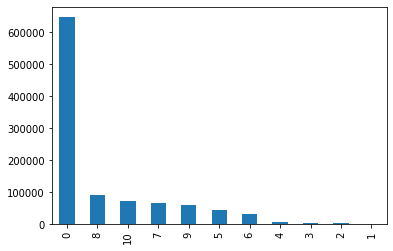

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display 

data["Book-Rating"].value_counts().plot(kind='bar')
plt.show()

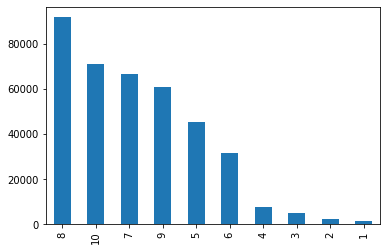

In [14]:
data = data[data["Book-Rating"] != 0]
data["Book-Rating"].value_counts().plot(kind='bar')
plt.show()

In [15]:
data.shape

(383852, 7)

In [18]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 23.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630058 sha256=0f2afab23a965641df88c8121b5ebfac0a1ea4a05c5cd9cfd68a6b9bd733d08d
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


## **Model Training**

In [19]:
from surprise import Reader, Dataset
reader = Reader(rating_scale = (1, 10))
df = Dataset.load_from_df(data[['User-ID','ISBN','Book-Rating']], reader)

In [20]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(df, test_size=0.25)

In [21]:
from surprise import SVD, accuracy
from surprise.model_selection import cross_validate
algo = SVD(n_epochs = 20, n_factors = 250, verbose = True) #increase n_factors to 250 to lower the RMSE value
algo.fit(trainset)
cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing

In [23]:
predictions = algo.test(testset)

## **Model Evaluation**

In [24]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.9638


0.9638285728544007

## **Model Deployment**

1. User-based filtering these systems recommend products to a user that similar users have liked. For example, let's say Alice and Bob have a similar interest in books (that is, they largely like and dislike the same books). Now, let's say a new book has been launched into the market, and Alice has read and loved it. It is, therefore, highly likely that Bob will like it too, and therefore, the system recommends this book to Bob.

2. Item-based filtering these systems are extremely similar to the content recommendation engine. These systems identify similar items based on how people have rated it in the past. For example, if Alice, Bob, and Eve have given 5 stars to The Lord of the Rings and The Hobbit, the system identifies the items as similar. Therefore, if someone buys The Lord of the Rings, the system also recommends The Hobbit to him or her.

In [25]:
predictions

[Prediction(uid=208584, iid='0316789992', r_ui=10.0, est=8.878598099769299, details={'was_impossible': False}),
 Prediction(uid=112001, iid='0671450344', r_ui=10.0, est=9.84739237392374, details={'was_impossible': False}),
 Prediction(uid=185722, iid='0425115801', r_ui=10.0, est=10, details={'was_impossible': False}),
 Prediction(uid=231727, iid='080411109X', r_ui=6.0, est=6.514891163693167, details={'was_impossible': False}),
 Prediction(uid=210276, iid='0451202899', r_ui=6.0, est=7.08808152889189, details={'was_impossible': False}),
 Prediction(uid=97996, iid='0671014471', r_ui=3.0, est=5.203368392736411, details={'was_impossible': False}),
 Prediction(uid=57255, iid='0440235987', r_ui=7.0, est=6.79084147277575, details={'was_impossible': False}),
 Prediction(uid=147847, iid='0373242042', r_ui=5.0, est=6.3383111288821095, details={'was_impossible': False}),
 Prediction(uid=190831, iid='0312195516', r_ui=8.0, est=7.645226216840493, details={'was_impossible': False}),
 Prediction(uid=2

In [26]:
testset[0]

(208584, '0316789992', 10.0)

In [39]:
recommendations = [pred for pred in predictions if pred[0] == 112001]

In [40]:
recommendations

[Prediction(uid=112001, iid='0671450344', r_ui=10.0, est=9.84739237392374, details={'was_impossible': False}),
 Prediction(uid=112001, iid='0060191821', r_ui=10.0, est=9.56488065910135, details={'was_impossible': False}),
 Prediction(uid=112001, iid='0553252607', r_ui=10.0, est=9.385033375937722, details={'was_impossible': False}),
 Prediction(uid=112001, iid='0385316895', r_ui=10.0, est=9.589921909015741, details={'was_impossible': False}),
 Prediction(uid=112001, iid='0553290789', r_ui=10.0, est=9.867462324676026, details={'was_impossible': False}),
 Prediction(uid=112001, iid='0753159538', r_ui=9.0, est=9.103513818971459, details={'was_impossible': False}),
 Prediction(uid=112001, iid='0316666343', r_ui=9.0, est=9.028855443424007, details={'was_impossible': False}),
 Prediction(uid=112001, iid='0684801175', r_ui=10.0, est=9.809275139852693, details={'was_impossible': False}),
 Prediction(uid=112001, iid='2207303772', r_ui=7.0, est=8.331681471755822, details={'was_impossible': False}

In [29]:
from collections import defaultdict

def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
    return top_n

all_pred = get_all_predictions(predictions)

In [30]:
all_pred

defaultdict(list,
            {208584: [('0316789992', 8.878598099769299),
              ('0316666343', 7.866436008320828)],
             112001: [('0385334710', 10),
              ('0553295977', 9.985250112912942),
              ('034537391X', 9.95354350034366),
              ('0399148248', 9.92517349470998),
              ('0553290789', 9.867462324676026),
              ('0671450344', 9.84739237392374),
              ('0449001814', 9.830138187537106),
              ('0755109597', 9.810884622952692),
              ('0684801175', 9.809275139852693),
              ('0764227122', 9.799757403320529),
              ('0671864831', 9.786979977315085),
              ('0671739778', 9.780715170727984),
              ('0440205638', 9.770215306101885),
              ('0446611085', 9.753139901526533),
              ('0821776711', 9.675047990406801),
              ('0871238829', 9.674255644280537),
              ('0451403789', 9.642853898778961),
              ('1568655878', 9.634817984647377),
   

In [31]:
new_all_pred=dict(filter(lambda elem: len(elem[1]) != 1, all_pred.items()))

In [32]:
new_all_pred

{208584: [('0316789992', 8.878598099769299),
  ('0316666343', 7.866436008320828)],
 112001: [('0385334710', 10),
  ('0553295977', 9.985250112912942),
  ('034537391X', 9.95354350034366),
  ('0399148248', 9.92517349470998),
  ('0553290789', 9.867462324676026),
  ('0671450344', 9.84739237392374),
  ('0449001814', 9.830138187537106),
  ('0755109597', 9.810884622952692),
  ('0684801175', 9.809275139852693),
  ('0764227122', 9.799757403320529),
  ('0671864831', 9.786979977315085),
  ('0671739778', 9.780715170727984),
  ('0440205638', 9.770215306101885),
  ('0446611085', 9.753139901526533),
  ('0821776711', 9.675047990406801),
  ('0871238829', 9.674255644280537),
  ('0451403789', 9.642853898778961),
  ('1568655878', 9.634817984647377),
  ('0671020447', 9.621998032412437),
  ('0425087832', 9.616688506804264),
  ('0385316895', 9.589921909015741),
  ('038531700X', 9.585514447491546),
  ('1404304606', 9.565518845943169),
  ('0060191821', 9.56488065910135),
  ('0451150244', 9.546415839500787),
  (

In [34]:
temp = new_all_pred.copy()

In [35]:
n = 2 #Got error for n>2
for uid, user_ratings in new_all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    new_all_pred[uid] = user_ratings[:n]
    
tmp = pd.DataFrame.from_dict(new_all_pred)
tmp_transpose = tmp.transpose()

In [36]:
tmp_transpose

,0,1
208584,"(0316789992, 8.878598099769299)","(0316666343, 7.866436008320828)"
112001,"(0385334710, 10)","(0553295977, 9.985250112912942)"
185722,"(0425115801, 10)","(0451196716, 10)"
231727,"(0345348036, 8.674355936435225)","(080411109X, 6.514891163693167)"
210276,"(0743411250, 7.489362446192416)","(0440235774, 7.155582257568526)"
...,...,...
252922,"(0452283868, 7.242715940729926)","(3499110660, 6.954820048927575)"
42180,"(055337513X, 8.69012151663651)","(0142001430, 8.585329171998243)"
85994,"(0937611018, 7.988472211744075)","(0062506838, 7.844026814537979)"
42923,"(0394716531, 7.738354446019148)","(0446610453, 7.2258255650433005)"


In [37]:
# Make Top 4 recommendations based on user id.
# Question: What movies does user_id = 41596 like?

def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

user_id=41596
results = get_predictions(user_id)
results

0    (0789455315, 6.479819497000195)
1    (1565652231, 5.909304841202399)
Name: 41596, dtype: object

In [38]:
# Question: What are the names of these books?
def findBookInfo(ISBN):
    return df_book[df_book['ISBN']==ISBN]

for item in results:
    book = findBookInfo(item[0]) #take ISBN values from result
    book_id_titles = book[['ISBN','Book-Title']]
    print(book_id_titles)

             ISBN                                Book-Title
82685  0789455315  Essential Computers: Digital Photography
             ISBN                               Book-Title
82695  1565652231  The 25 Strangest Mysteries in the World


In [47]:
data.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8


In [49]:
column_names = ["User-ID", "ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher", "Book-Rating"]
data = data.reindex(columns=column_names)
data.head(3)

,User-ID,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
1,8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
3,11676,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
5,67544,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8


In [42]:
import numpy as np

In [59]:
#Use first dataset that we merge from data_book and data_rating
def get_recommendation(id):
    # get all unique ISBN
    uniq_ISBN = data['ISBN'].unique()
    # get the list of ISBN number for books that specicfied user has read
    isbn_user = data.loc[data['User-ID']==user_id, 'ISBN']
    print ("User Id " + id + " has read book with ISBN number " + ", ".join(isbn_user.values))
    # remove the user has read
    new_book = np.setdiff1d(uniq_ISBN,isbn_user)

    new_recommend = []
    for iid in new_book:
        new_recommend.append((iid, algo.predict(uid=id,iid=iid).est))
    recommend = pd.DataFrame(new_recommend, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)
    print("Top 10 recommendation for user " + id + " is :  \n" + "\n".join(recommend['iid'].values))
    return(recommend)

user_id = '175934'
top_recommendation = get_recommendation(user_id)


User Id 175934 has read book with ISBN number 
Top 10 recommendation for user 175934 is :  
0345339738
0140143505
067168390X
043936213X
0439136369
0618002235
0836213319
0439425220
006092988X
0440174643


In [60]:
top_recommendation

,iid,predictions
24539,0345339738,8.979029
9386,0140143505,8.977057
75951,067168390X,8.916029
46430,043936213X,8.864846
46127,0439136369,8.863604
71463,0618002235,8.852243
103901,0836213319,8.834259
46492,0439425220,8.815529
4179,006092988X,8.786617
46945,0440174643,8.774973


In [70]:
top_recommendation = top_recommendation.rename(columns = {'iid' : 'ISBN'})

In [83]:
#get title of the book
d1 = pd.merge(df_book, top_recommendation, on="ISBN", how="right")
print("The top 10 books details recommend to user 175934 are :")
d1.head(10)

The top 10 books details recommend to user 175934 are :


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,predictions
0,0345339738,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,1986,Del Rey,8.979029
1,0140143505,84 Charing Cross Road,Helene Hanff,1990,Penguin Books,8.977057
2,067168390X,Lonesome Dove,Larry McMurtry,1988,Pocket,8.916029
3,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic,8.864846
4,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,8.863604
5,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,1999,Houghton Mifflin Company,8.852243
6,0836213319,Dilbert: A Book of Postcards,Scott Adams,1996,Andrews McMeel Pub,8.834259
7,0439425220,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,2002,Scholastic,8.815529
8,006092988X,A Tree Grows in Brooklyn,Betty Smith,1998,Perennial,8.786617
9,0440174643,Roots,ALEX HALEY,1980,Dell,8.774973
